In [4]:
import torch

w=torch.tensor(2.0,requires_grad=True)
b=torch.tensor(-1.0,requires_grad=True)

def forward(x):
    y=w*x+b
    return y

x=torch.tensor([1.0])

yhat=forward(x)


In [5]:
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [6]:
x=torch.tensor([[1],[2]])
yhat=forward(x)

In [7]:
yhat

tensor([[1.],
        [3.]], grad_fn=<AddBackward0>)

In [8]:
from torch.nn import Linear
model=Linear(in_features=1,out_features=1)
y=model(x)

RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #2 'mat1' in call to _th_addmm

In [9]:
from torch.nn import Linear
torch.manual_seed(1)
model=Linear(in_features=1,out_features=1)
print(list(model.parameters()))


[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [10]:
x=torch.tensor([0.0])
yhat=model(x)
yhat

tensor([-0.4414], grad_fn=<AddBackward0>)

In [11]:
import torch.nn as nn
class LR(nn.Module):
    def __init__(self,in_size,output_size):
        super(LR,self).__init__()
        self.linear=nn.Linear(in_size,output_size)
    def forward(self,x):
        out=self.linear(x)
        return out 
    
    

In [12]:
model=LR(1,1)
model.state_dict()['linear.weight'].data[0]=torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0]=torch.tensor([-0.4414])
print(list(model.parameters()))


[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [13]:
import torch
w=torch.tensor(-10.0,requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X
import matplotlib.pyplot as plt

plt.plot(X.numpy(),f.numpy())
plt.show()

<Figure size 640x480 with 1 Axes>

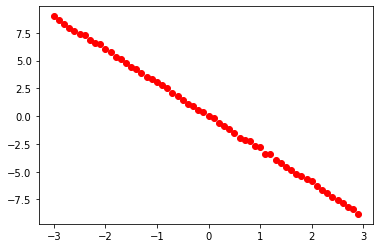

In [14]:
Y=f+0.1*torch.randn(X.size())
plt.plot(X.numpy(),Y.numpy(),'ro')
plt.show()

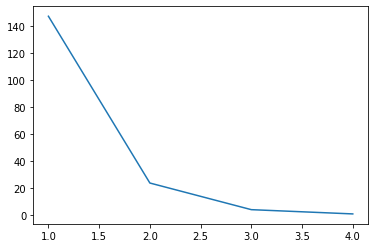

In [15]:
import numpy as np
def forward(x):
    return w*x
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)
    
lr=0.1
COST=[]

for epoch in range(4):
    yhat=forward(X)
    loss=criterion(yhat,Y)
    
    loss.backward()
    
    w.data=w.data-lr*w.grad.data
    w.grad.data.zero_()
    COST.append(loss.item())
    
    
e=[1, 2, 3, 4]
plt.plot(e,COST)
plt.show()

In [16]:
COST

[147.05828857421875, 23.49740982055664, 3.760610342025757, 0.6079815030097961]

In [17]:
epoch

3

In [18]:
e

[1, 2, 3, 4]

In [19]:
epoch

3

In [20]:
e

[1, 2, 3, 4]

In [21]:


def forward(x):
    y=w*x+b
    
    return y

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1,1) #Number for rows don't know that's why -1
f=1*X-1
Y=f+0.1*torch.randn(X.size())
lr=0.1
for epoch in range(15):
    Yhat=forward(X)
    loss=criterion(Yhat,Y)
    loss.backward()
    w.data=w.data-lr*w.grad.data
    w.grad.data.zero_()
    b.data=b.data-lr*b.grad.data
    b.grad.data.zero_()
    




    

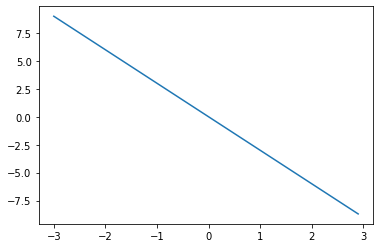

In [22]:
#Stochastic Gradient Descent
w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X
import matplotlib.pyplot as plt
plt.plot(X.numpy(),f.numpy())
plt.show()

In [23]:
Y=f+0.1*torch.randn(X.size())

In [24]:

import torch 
def forward(x):
    y=w*x+b
    return y

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)
X=torch.arange(-3,3,0.1).view(-1,1)
f=-3*X
Y=f+0.1*torch.randn(X.size())

lr=0.1
for epoch in range(4):
    for x,y in zip(X,Y):
        yhat=forward(X)
        loss=criterion(yhat,y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
        
        
          

In [31]:
from torch.utils.data import Dataset,DataLoader
class Data(Dataset):
    
    def __init__(self):
        self.x=torch.arange(-3,3,0.1).view(-1,1)
        self.y=-3*self.x+1
        self.len=self.x.shape[0]
        
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len
    

In [32]:
dataset=Data()

In [33]:
dataset[0]

(tensor([-3.]), tensor([10.]))

In [35]:

trainloader=DataLoader(dataset=dataset,batch_size=1)
for x,y in trainloader:
        yhat=forward(X)
        loss=criterion(yhat,y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()


In [1]:
#stochastic gradient descent with dataloader 
import torch 
from torch.utils.data import Dataset,DataLoader

class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,1.0).view(-1,1)
        self.y=-3*self.x+1
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len 
    

In [2]:
dataset=Data()
x,y=dataset[0]

In [3]:
x

tensor([-3.])

In [5]:
def forward(x):
    y=w*x+b
    
    return y

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

w=torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)
X=torch.arange(-3,3,0.1).view(-1,1) #Number for rows don't know that's why -1
f=1*X-1
Y=f+0.1*torch.randn(X.size())
lr=0.1


In [7]:
trainloader=DataLoader(dataset=dataset,batch_size=1)



for epoch in range(4):
    
     for x,y in trainloader:
        yhat=forward(x)
        loss=criterion(yhat,y)
        loss.backward()
        w.data=w.data-lr*w.grad.data
        b.data=b.data-lr*b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
    

In [8]:
#with optimizer
import torch 
from torch.utils.data import Dataset,DataLoader

class Data(Dataset):
    def __init__(self):
        self.x=torch.arange(-3,3,1.0).view(-1,1)
        self.y=-3*self.x+1
        self.len=self.x.shape[0]
    def __getitem__(self,index):
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len 

In [14]:
import torch.nn as nn

class LR(nn.Module):
    def __init__self(self,in_size,output_size):
        super(LR,self).__init__()
self.linear=nn.Linear(in_size,output_size)
def forward(self,x):
    out=self.linear(x)
    return out
    

NameError: name 'in_size' is not defined